# Submesoscale parameterization comparison

This script presents metrics to compares between the different versions of the submesoscale parameterizations: Fox-Kemper 2011, Bodner 2023, and the CNN prediction.

Here we focus only on the **gulf stream region** for now but will later apply to more regions and time series sections

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import xarray as xr
import glob
from xgcm import Grid


#path
BASE = '/scratch/ab10313/pleiades/01_gulf_smooth/'

PATH_NN = BASE+'NN_data_smooth/'
#os.mkdir(PATH_NN)

# gulf stream path
PATH_gulf = BASE+'preprcossed_data/'


In [2]:
# helpfer functions

def coarse_grain(data,time_factor, grid_factor):
    if len(data.dims) == 3:
        data_cg = data.rolling(time=time_factor, center=True).mean().dropna(dim="time", how="all").coarsen(i=grid_factor,j=grid_factor, boundary="trim").mean()
    elif len(data.dims) == 2:
        data_cg = np.tile(data.coarsen(i=grid_factor,j=grid_factor, boundary="trim").mean(),(846,1,1))
    return data_cg

In [35]:
B.time.isel(time=slice(213,396))

<xarray.DataArray 'time' (time: 183)>
array(['2012-01-01T05:30:00.000000000', '2012-01-01T17:30:00.000000000',
       '2012-01-02T05:30:00.000000000', '2012-01-02T17:30:00.000000000',
       '2012-01-03T05:30:00.000000000', '2012-01-03T17:30:00.000000000',
       '2012-01-04T05:30:00.000000000', '2012-01-04T17:30:00.000000000',
       '2012-01-05T05:30:00.000000000', '2012-01-05T17:30:00.000000000',
       '2012-01-06T05:30:00.000000000', '2012-01-06T17:30:00.000000000',
       '2012-01-07T05:30:00.000000000', '2012-01-07T17:30:00.000000000',
       '2012-01-08T05:30:00.000000000', '2012-01-08T17:30:00.000000000',
       '2012-01-09T05:30:00.000000000', '2012-01-09T17:30:00.000000000',
       '2012-01-10T05:30:00.000000000', '2012-01-10T17:30:00.000000000',
       '2012-01-11T05:30:00.000000000', '2012-01-11T17:30:00.000000000',
       '2012-01-12T05:30:00.000000000', '2012-01-12T17:30:00.000000000',
       '2012-01-13T05:30:00.000000000', '2012-01-13T17:30:00.000000000',
       '2012-01-14T05:30:00.000000000', '2012-01-14T17:30:00.000000000',
       '2012-01-15T05:30:00.000000000', '2012-01-15T17:30:00.000000000',
       '2012-01-16T05:30:00.000000000', '2012-01-16T17:30:00.000000000',
       '2012-01-17T05:30:00.000000000', '2012-01-17T17:30:00.000000000',
       '2012-01-18T05:30:00.000000000', '2012-01-18T17:30:00.000000000',
       '2012-01-19T05:30:00.000000000', '2012-01-19T17:30:00.000000000',
       '2012-01-20T05:30:00.000000000', '2012-01-20T17:30:00.000000000',
       '2012-01-21T05:30:00.000000000', '2012-01-21T17:30:00.000000000',
       '2012-01-22T05:30:00.000000000', '2012-01-22T17:30:00.000000000',
       '2012-01-23T05:30:00.000000000', '2012-01-23T17:30:00.000000000',
       '2012-01-24T05:30:00.000000000', '2012-01-24T17:30:00.000000000',
       '2012-01-25T05:30:00.000000000', '2012-01-25T17:30:00.000000000',
       '2012-01-26T05:30:00.000000000', '2012-01-26T17:30:00.000000000',
       '2012-01-27T05:30:00.000000000', '2012-01-27T17:30:00.000000000',
       '2012-01-28T05:30:00.000000000', '2012-01-28T17:30:00.000000000',
       '2012-01-29T05:30:00.000000000', '2012-01-29T17:30:00.000000000',
       '2012-01-30T05:30:00.000000000', '2012-01-30T17:30:00.000000000',
       '2012-01-31T05:30:00.000000000', '2012-01-31T17:30:00.000000000',
       '2012-02-01T05:30:00.000000000', '2012-02-01T17:30:00.000000000',
       '2012-02-02T05:30:00.000000000', '2012-02-02T17:30:00.000000000',
       '2012-02-03T05:30:00.000000000', '2012-02-03T17:30:00.000000000',
       '2012-02-04T05:30:00.000000000', '2012-02-04T17:30:00.000000000',
       '2012-02-05T05:30:00.000000000', '2012-02-05T17:30:00.000000000',
       '2012-02-06T05:30:00.000000000', '2012-02-06T17:30:00.000000000',
       '2012-02-07T05:30:00.000000000', '2012-02-07T17:30:00.000000000',
       '2012-02-08T05:30:00.000000000', '2012-02-08T17:30:00.000000000',
       '2012-02-09T05:30:00.000000000', '2012-02-09T17:30:00.000000000',
       '2012-02-10T05:30:00.000000000', '2012-02-10T17:30:00.000000000',
       '2012-02-11T05:30:00.000000000', '2012-02-11T17:30:00.000000000',
       '2012-02-12T05:30:00.000000000', '2012-02-12T17:30:00.000000000',
       '2012-02-13T05:30:00.000000000', '2012-02-13T17:30:00.000000000',
       '2012-02-14T05:30:00.000000000', '2012-02-14T17:30:00.000000000',
       '2012-02-15T05:30:00.000000000', '2012-02-15T17:30:00.000000000',
       '2012-02-16T05:30:00.000000000', '2012-02-16T17:30:00.000000000',
       '2012-02-17T05:30:00.000000000', '2012-02-17T17:30:00.000000000',
       '2012-02-18T05:30:00.000000000', '2012-02-18T17:30:00.000000000',
       '2012-02-19T05:30:00.000000000', '2012-02-19T17:30:00.000000000',
       '2012-02-20T05:30:00.000000000', '2012-02-20T17:30:00.000000000',
       '2012-02-21T05:30:00.000000000', '2012-02-21T17:30:00.000000000',
       '2012-02-22T05:30:00.000000000', '2012-02-22T17:30:00.000000000',
       '2012-02-23T05:30:00.000000000', '2012-02-23T17:30:00.000000000',
       '2012-02-24T0

## Load data

In [3]:
# coarse-res horizontal buoyancy gradient 
B = coarse_grain(xr.open_dataarray(PATH_gulf+'B.nc'),time_factor=14,grid_factor=12)
B_x = (B.diff(dim='i')/(12*B.dxF)).interp(i=B.i,j=B.j,kwargs={"fill_value": "extrapolate"})
B_y = (B.diff(dim='j')/(12*B.dyF)).interp(i=B.i,j=B.j,kwargs={"fill_value": "extrapolate"})
grad_B = np.sqrt(B_y**2 + B_x**2)

In [1344]:
# W
W = coarse_grain(xr.open_dataarray(PATH_gulf+'W.nc'),time_factor=14,grid_factor=12)

In [1345]:
# WB
WB = coarse_grain(xr.open_dataarray(PATH_gulf+'WB.nc'),time_factor=14,grid_factor=12)

In [1346]:
# Coriolis
FCOR = coarse_grain(xr.open_dataarray(PATH_gulf+'FCOR.nc'),time_factor=14,grid_factor=12)

In [1347]:
# H mixed layer (NEGATIVE)
HML = coarse_grain(xr.open_dataarray(PATH_gulf+'HML.nc'),time_factor=14,grid_factor=12)
HML = -HML

In [1348]:
# Nsquared 
#also making Nsquared very small but not zero to avoid singularity
# look at gsw to compute a different way. 
# IMPORTANT: SETTING TO 1e-5 just to move forward for now

Nsquared = coarse_grain(xr.open_dataarray(PATH_gulf+'Nsquared.nc'),time_factor=14,grid_factor=12)
Nsquared = Nsquared.where(Nsquared>=0).where(Nsquared<=0).fillna(1e-5)

In [1349]:
# wind stress
TAUX = coarse_grain(xr.open_dataarray(PATH_gulf+'TAUX.nc'),time_factor=14,grid_factor=12)
TAUY = coarse_grain(xr.open_dataarray(PATH_gulf+'TAUY.nc'),time_factor=14,grid_factor=12)
TAU = np.sqrt(TAUY**2 + TAUX**2)

In [1350]:
# surface heat flux
Q = coarse_grain(xr.open_dataarray(PATH_gulf+'Q.nc'),time_factor=14,grid_factor=12)
Q = Q.where(Q<0.).fillna(0.)

In [1351]:
# H boundary layer (POSITIVE)
HBL = coarse_grain(xr.open_dataarray(PATH_gulf+'HBL.nc'),time_factor=14,grid_factor=12)

## LLC4320 subgrid vertical buoyancy fluxes

In [1352]:
# subgrid WB subgrid
WB_sg = WB - W*B

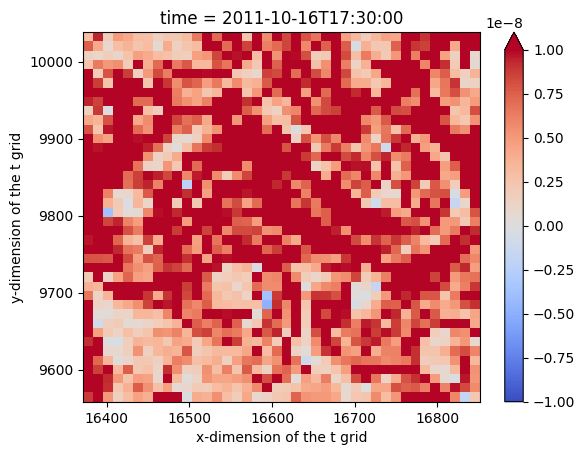

In [1353]:
WB_sg.isel(time=60).plot(vmin=-1e-8,vmax=1e-8, cmap='coolwarm')

## Fox-Kemper Psi parameterization

In [1354]:
Psi_FK08_param_x = ((HML**2) * B_y)/np.sqrt(FCOR**2)
Psi_FK08_param_y = -((HML**2) * B_x)/np.sqrt(FCOR**2)

## Fox-Kemper 2011 rescaled parameterization

In [1355]:
# artificial damping near equator / ignoring this for the gulf region
tau = 86400 

In [1356]:
# grid scale
ds = 0.5*((12*B.dyF)**2 + (12*B.dyF)**2)**0.5

In [1357]:
ds

<xarray.DataArray 'dyF' (j: 40, i: 40)>
array([[17002.469, 17002.469, 17002.469, ..., 17002.469, 17002.469,
        17002.469],
       [16968.162, 16968.162, 16968.162, ..., 16968.162, 16968.162,
        16968.162],
       [16933.715, 16933.715, 16933.715, ..., 16933.715, 16933.715,
        16933.715],
       ...,
       [15656.061, 15656.061, 15656.061, ..., 15656.061, 15656.061,
        15656.061],
       [15617.876, 15617.876, 15617.876, ..., 15617.876, 15617.876,
        15617.876],
       [15579.619, 15579.619, 15579.619, ..., 15579.619, 15579.619,
        15579.619]], dtype=float32)
Coordinates:
    CS       (j, i) float32 -6.844e-15 1.095e-14 ... 8.961e-15 -8.967e-15
    Depth    (j, i) float32 5.441e+03 5.507e+03 ... 5.295e+03 5.242e+03
    SN       (j, i) float32 -1.0 -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    XC       (j, i) float32 -56.79 -56.54 -56.29 -56.04 ... -47.54 -47.29 -47.04
    YC       (j, i) float32 30.1 30.1 30.1 30.1 30.1 ... 37.56 37.56 37.56 37.56
    dxF      (j, i) float32 1.844e+03 1.844e+03 ... 1.697e+03 1.697e+03
    dyF      (j, i) float32 2.004e+03 2.004e+03 ... 1.836e+03 1.836e+03
  * i        (i) float64 1.638e+04 1.639e+04 1.64e+04 ... 1.683e+04 1.685e+04
  * j        (j) float64 9.564e+03 9.576e+03 9.588e+03 ... 1.002e+04 1.003e+04
    rA       (j, i) float32 3.694e+06 3.694e+06 ... 3.115e+06 3.115e+06

In [1358]:
# frontal width = mixed layer deformation radius
Lf_FK11 = (np.sqrt(Nsquared)*HML)/np.sqrt(FCOR**2 + tau**-2)

# use Lf_min as 1000
#Lf_FK11 = Lf_FK11.where(Lf_FK11>=1000).fillna(1000)

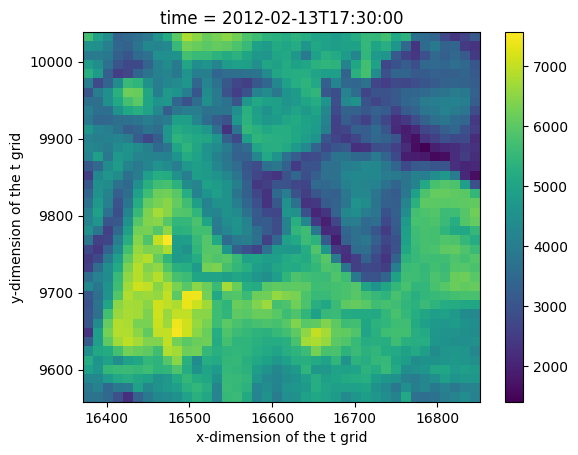

In [1359]:
Lf_FK11.isel(time=300).plot()

In [1360]:
# Fox-Kemper 2011 rescaled parameterization   
Ce = 0.07
#Psi_FK11_param_x = Ce * (ds/Lf_FK11) * Psi_FK08_param_x
#Psi_FK11_param_y = Ce * (ds/Lf_FK11) * Psi_FK08_param_y

#WB_FK11_param = (Psi_FK11_param_x*B_y - Psi_FK11_param_y*B_x)
WB_FK11_param =  Ce * (ds/np.maximum(Lf_FK11,5000)) * (Psi_FK08_param_x*B_y - Psi_FK08_param_y*B_x)

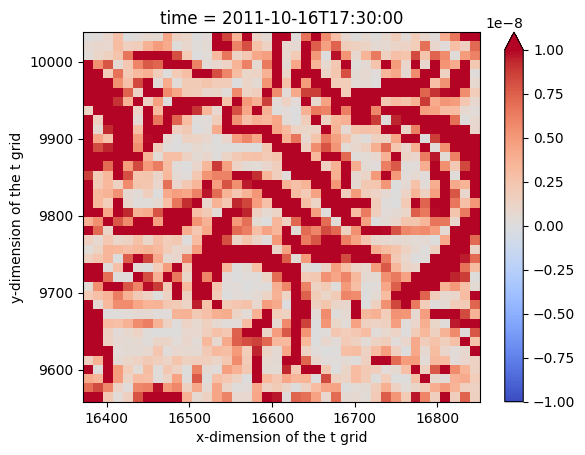

In [1361]:
WB_FK11_param.isel(time=60).plot(vmin=-1e-8,vmax=1e-8, cmap='coolwarm')


## Bodner 2023 modified rescaled parameterization

In [1362]:
# coefficients from Bodner 2023 
m_star = 0.5
n_star = 0.066
Cl = 0.25
rho0 = 1000

In [1363]:
# u_star
u_star = np.sqrt(TAU/rho0)

In [1364]:
# w_star
cp_w = 4.2e3 
galpha = 1.962e-3              

B0 = (galpha/rho0/cp_w )*Q

w_star = (-B0*HBL)**(1/3) 

In [1365]:
# frontal width from TTW relationship

# Lf with HBL = KPPhbl
Lf_Bodner23 = (Cl *(m_star*u_star**3 + n_star*w_star**3)**(2/3))/((FCOR**2)*(HBL))

# Lf with HBL = Hepbl
#Hepbl =  (HBL/HBL)*((m_star*u_star**3 + n_star*w_star**3)**(1/3))/(FCOR**2)**0.5

#Lf_Bodner23 = (Cl *(m_star*u_star**3 + n_star*w_star**3)**(2/3))/((FCOR**2)*(Hepbl))


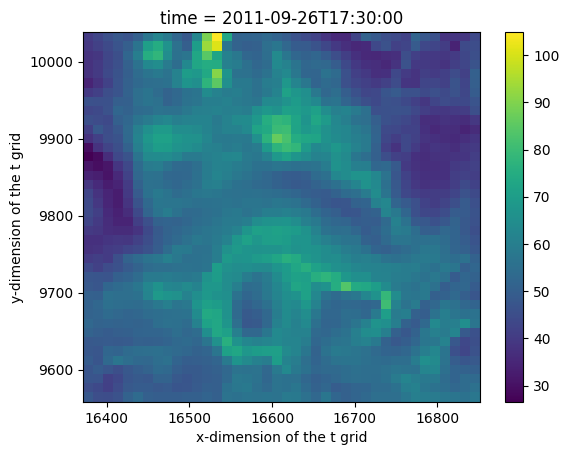

In [1366]:
Lf_Bodner23.isel(time=20).plot()

In [1367]:
# Bodner 2023 rescaled parameterization    

WB_Bodner23_param = 0.1*Ce* (ds/Lf_Bodner23)*(Psi_FK08_param_x*B_y - Psi_FK08_param_y*B_x)

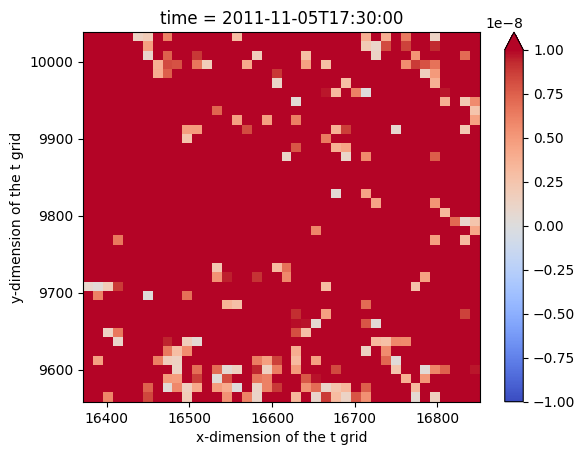

In [1368]:
WB_Bodner23_param.isel(time=100).plot(vmin=-1e-8, vmax=1e-8, cmap='coolwarm')

## CNN prediction

# Metrics to compare paramterizations

### joint distribution

In [1329]:
WB_Bodner23_param.name = 'Bodner23'
WB_FK11_param.name = 'FK11'
WB_sg.name = 'WB_subgrid'

In [1330]:
Bod23_minus_FK11 = WB_Bodner23_param-WB_FK11_param
Bod23_minus_FK11.name = 'Bodner23_minus_FK11'

In [1331]:
from xhistogram.xarray import histogram as xhist

xhist_Bodner23 = xhist(WB_Bodner23_param.chunk({'time':1}), WB_sg.chunk({'time':1}),
                       bins=[np.logspace(-10,-6,30), 
                             np.concatenate((-np.logspace(-6,-10,30),
                                             np.concatenate((np.linspace(-9e-11,9e-11,5),
                                                             np.logspace(-10,-6,30)))))
                            ]
                      ).compute()

xhist_FK11 = xhist(WB_FK11_param.chunk({'time':1}), 
      WB_sg.chunk({'time':1}),
      bins=[np.logspace(-10,-6,30), 
            np.concatenate((-np.logspace(-6,-10,30),
                            np.concatenate((np.linspace(-9e-11,9e-11,5),
                                            np.logspace(-10,-6,30)))))
           ]
     ).compute()

xhist_Bod23_minus_FK11 = xhist(Bod23_minus_FK11.chunk({'time':1}), 
      WB_sg.chunk({'time':1}),
      bins=[np.logspace(-10,-6,30), 
            np.concatenate((-np.logspace(-6,-10,30),
                            np.concatenate((np.linspace(-9e-11,9e-11,5),
                                            np.logspace(-10,-6,30)))))
           ]
     ).compute()

Text(0, 0.5, '$\\Psi^{\\tt Bod}\\times\\overline{\\langle b^m}^z$')

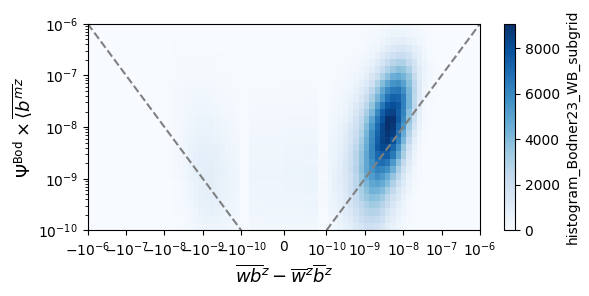

In [1332]:
fig, ax = plt.subplots(figsize=(6,3))
fig.set_tight_layout(True)

xhist_Bodner23.plot(ax=ax, cmap='Blues')

ax.plot(np.linspace(1e-10,1e-6), np.linspace(1e-10,1e-6), c='grey', ls='--')
ax.plot(np.linspace(-1e-6,-1e-10), np.linspace(1e-6,1e-10), c='grey', ls='--')
ax.set_xscale('symlog', linthresh=1e-10)
ax.set_yscale('log')
ax.set_ylim([1e-10,1e-6])
ax.set_xlim([-1e-6,1e-6])
ax.set_xlabel(r"$\overline{wb}^z-\overline{w}^z\overline{b}^z$", fontsize=13)
ax.set_ylabel(r"$\Psi^{\tt Bod}\times\overline{\langle b^m}^z$", 
              fontsize=13)

#plt.savefig(op.join(sdir,'Figs/eNATL60-wb_medianCr-hist_region%02d.pdf' % reg))

Text(0, 0.5, '$\\Psi^{\\tt FK}\\times\\overline{\\nabla b}^z$')

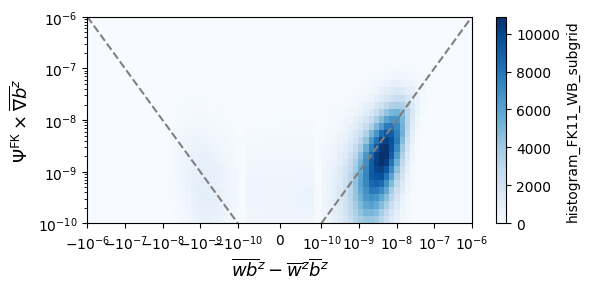

In [1333]:
fig, ax = plt.subplots(figsize=(6,3))
fig.set_tight_layout(True)

xhist_FK11.plot(ax=ax, cmap='Blues')

ax.plot(np.linspace(1e-10,1e-6), np.linspace(1e-10,1e-6), c='grey', ls='--')
ax.plot(np.linspace(-1e-6,-1e-10), np.linspace(1e-6,1e-10), c='grey', ls='--')
ax.set_xscale('symlog', linthresh=1e-10)
ax.set_yscale('log')
ax.set_ylim([1e-10,1e-6])
ax.set_xlim([-1e-6,1e-6])
ax.set_xlabel(r"$\overline{wb}^z-\overline{w}^z\overline{b}^z$", fontsize=13)
ax.set_ylabel(r"$\Psi^{\tt FK}\times\overline{\nabla b}^z$", 
              fontsize=13)

#plt.savefig(op.join(sdir,'Figs/eNATL60-wb_medianCr-hist_region%02d.pdf' % reg))

Text(0, 0.5, '$(\\Psi^{\\tt Bod}- \\Psi^{\\tt FK})\\times\\overline{\\nabla b}^z$')

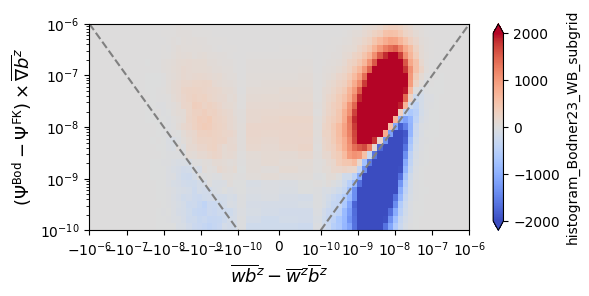

In [1334]:
fig, ax = plt.subplots(figsize=(6,3))
fig.set_tight_layout(True)

(xhist_Bodner23 - xhist_FK11.data).plot(ax=ax, cmap='coolwarm', vmin=-2000, vmax= 2000)

ax.plot(np.linspace(1e-10,1e-6), np.linspace(1e-10,1e-6), c='grey', ls='--')
ax.plot(np.linspace(-1e-6,-1e-10), np.linspace(1e-6,1e-10), c='grey', ls='--')
ax.set_xscale('symlog', linthresh=1e-10)
ax.set_yscale('log')
ax.set_ylim([1e-10,1e-6])
ax.set_xlim([-1e-6,1e-6])
ax.set_xlabel(r"$\overline{wb}^z-\overline{w}^z\overline{b}^z$", fontsize=13)
ax.set_ylabel(r"$(\Psi^{\tt Bod}- \Psi^{\tt FK})\times\overline{\nabla b}^z$", 
              fontsize=13)

#plt.savefig(op.join(sdir,'Figs/eNATL60-wb_medianCr-hist_region%02d.pdf' % reg))

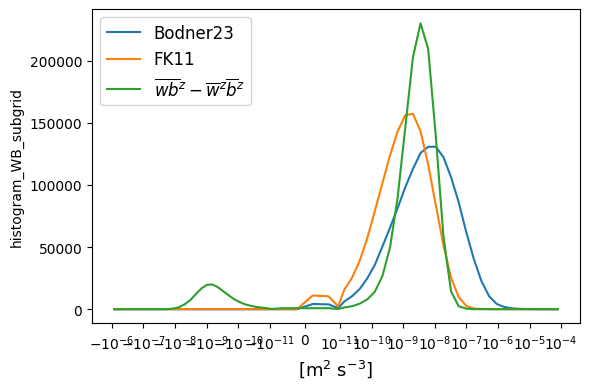

In [1335]:
fig, ax = plt.subplots(figsize=(6,4))
fig.set_tight_layout(True)

xhist(WB_Bodner23_param.chunk({'time':1}), 
      bins=[np.concatenate((-np.logspace(-6,-11,30),
                            np.concatenate((np.linspace(-9e-12,9e-12,5),
                                            np.logspace(-11,-4,30)))))
           ]
     ).plot(ax=ax, label=r"Bodner23")
xhist(WB_FK11_param.chunk({'time':1}), 
      bins=[np.concatenate((-np.logspace(-6,-11,30),
                            np.concatenate((np.linspace(-9e-12,9e-12,5),
                                            np.logspace(-11,-4,30)))))
           ]
     ).plot(ax=ax, label=r"FK11")
xhist(WB_sg.chunk({'time':1}), 
      bins=[np.concatenate((-np.logspace(-6,-11,30),
                            np.concatenate((np.linspace(-9e-12,9e-12,5),
                                            np.logspace(-11,-4,30)))))
           ]
     ).plot(ax=ax, label=r"$\overline{wb}^z-\overline{w}^z\overline{b}^z$")
ax.set_xscale('symlog', linthresh=1e-11)
ax.set_xlabel(r"[m$^2$ s$^{-3}$]", fontsize=13)
ax.legend(loc='upper left', fontsize=12)
#plt.savefig(op.join(sdir,'Figs/eNATL60-wb-1Dhist_region%02d.pdf' % reg))

# Seasonality